# **Spatial Filtering**

## Types of filters:
Blurring can be achieved by many ways. The common type of filters that are used to perform blurring are.

  1. **Mean filter**
  2. **Weighted average filter**
  3. **Gaussian filter**
  
Out of these three, we are going to focus on the first one here. The Average and Gaussian Filters will be discussed later.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
my_img = mpimg.imread("data/fruits.jpg")

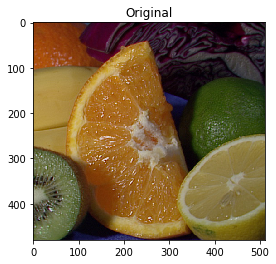

In [3]:
plt.imshow(my_img)
plt.title('Original')
plt.show()

### Convert Image to Grayscale Image

In [4]:
def get_distance(pixel,w=[1/3,1/3,1/3]):
    r,g,b = pixel[0],pixel[1],pixel[2]
    w0,w1,w2=w[0],w[1],w[2]
    return ((r**2)*w0+(g**2)*w1+(b**2)*w2)**0.5
    
def convert_RGB2GRAY(img,weights=[0.6,0.3,0.1]):
    m=img.shape[0]
    n=img.shape[1]
    gray_img = np.zeros((m,n),dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            gray_img[i,j]=get_distance(img[i,j,:],weights)
    return gray_img

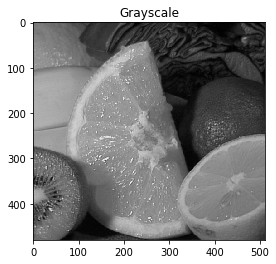

In [5]:
grayscale = convert_RGB2GRAY(my_img)
plt.imshow(grayscale,cmap='gray')
plt.title('Grayscale')
plt.show()

### Defining Filter Functions

In [6]:
def get_mean_filter(filtsize=(3,3)):
    return np.ones(filtsize,dtype=np.uint8)/9

def apply_default_mean_filter(roi):
    return np.uint8(np.sum(roi*get_mean_filter()))

def get_median(roi):
    s_1 = roi.reshape(1,9)
    s_1.sort()
    return s_1[1,4]

##### Testing Filter Functions

In [7]:
get_mean_filter()

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [8]:
get_mean_filter((5,5))

array([[0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])

In [9]:
get_mean_filter((7,7))

array([[0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111]])

In [19]:
roi=my_img[2-1:2+2,2-1:2+2]
apply_default_mean_filter(roi)

214

### Defining blur_image(gray_img) Function

This function calls apply_default_mean_filter function and applies the default mask or filter to the gray level image taken as argument to blur it.

In [11]:
def blur_image(gray_img):
    m=gray_img.shape[0]
    n=gray_img.shape[1]
    filt_img = np.zeros((m,n),dtype=np.uint8)
    for i in range(1,m-1):
        for j in range(1,n-1):
            roi=gray_img[i-1:i+2,j-1:j+2]
            filt_img[i,j] = apply_default_mean_filter(roi) #get_median(roi)  
    return filt_img


#### Blurring Grayscale Image

In [12]:
def iterate_blurring(grayscale,n=1):
    filt_img = blur_image(grayscale)
    if n >1 :
        for i in range(1,n):
            filt_img = blur_image(filt_img)
        return filt_img
    else:
        return filt_img

In [13]:
filt_img = iterate_blurring(gray_img,10)

NameError: name 'gray_img' is not defined

### Plotting Results

In [ ]:
plt.figure(1,figsize=(10,10))

plt.subplot(121)
plt.xticks([]),plt.yticks([])
plt.title("Original")
plt.imshow(gray_img,cmap='gray')


plt.subplot(122)
plt.title("Blurred")
plt.xticks([]),plt.yticks([])
plt.imshow(filt_img,cmap='gray')

plt.show()